In [14]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('dataset.csv')
# print(df.head())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
print(df['sex'].unique())

[1 0]


In [19]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
df.value_counts('target')

target
0    164
1    139
Name: count, dtype: int64

In [21]:
x = df.drop("target", axis = 1)
y = df["target"]

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
#Standardize the data, it'll help PCA to work better
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
selected_features = []
remainig_features = list(df.drop('target', axis =1).columns)

In [25]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [26]:
best_score =0
while remainig_features :
    best_feature = None
    for feature in remainig_features :
        temp_features = selected_features + [feature]
        X_train_temp = X_train[:, [df.columns.get_loc(f) for f in temp_features]]
        X_test_temp = X_test[:, [df.columns.get_loc(f) for f in temp_features]]
        
        # Train the Random Forest model

        rf_model.fit(X_train_temp, Y_train)
        Y_pred = rf_model.predict(X_test_temp)
        score = accuracy_score(Y_test, Y_pred)
        
        if score > best_score:
            best_score = score
            best_feature = feature
            
    if best_feature:
        selected_features.append(best_feature)
        remainig_features.remove(best_feature)
        print(f'ADDED FEATURE : {best_feature}, SCORE : {best_score: .4f}')
    else:
        break




ADDED FEATURE : thal, SCORE :  0.8022


In [32]:
print(f'Selected features: {selected_features}')
print(f'Length: {len(selected_features)}')

Selected features: ['thal']
Length: 1


In [28]:
# Train the Random Forest model with the selected features
rf_model.fit(X_train[:, [df.columns.get_loc(f) for f in selected_features]], Y_train)

# Predict on test data
y_rf_pred = rf_model.predict(X_test[:, [df.columns.get_loc(f) for f in selected_features]])

# Print the classification report (precision, recall, F1-score)
print("Classification Report for Random Forest:")
print(classification_report(Y_test, y_rf_pred))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        48
           1       0.79      0.79      0.79        43

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [29]:

# Calculate AUC-ROC score
y_rf_prob = rf_model.predict_proba(X_test[:, [df.columns.get_loc(f) for f in selected_features]])[:, 1]
auc_rf = roc_auc_score(Y_test, y_rf_prob)
print(f"AUC-ROC Score for Random Forest: {auc_rf:.4f}")


AUC-ROC Score for Random Forest: 0.8011


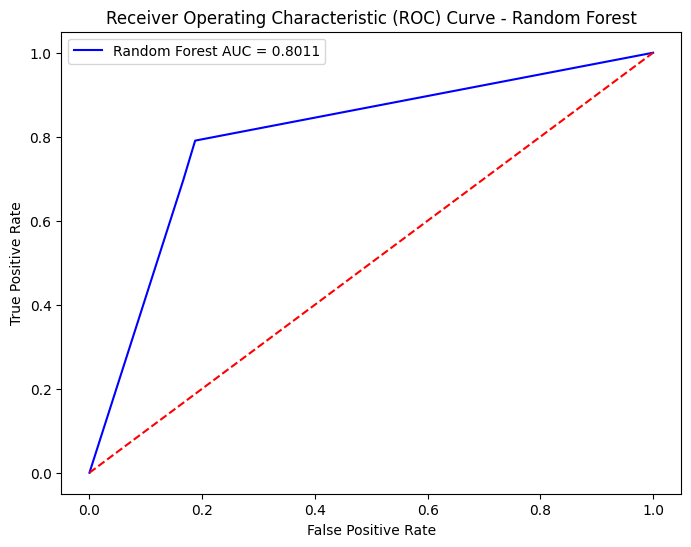

In [30]:

# Plot the ROC Curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_rf_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest AUC = {auc_rf:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend()
plt.show()


In [31]:

# Final accuracy of the model
final_accuracy = accuracy_score(Y_test, y_rf_pred)
print(f'Final accuracy with selected features: {final_accuracy:.4f}')

Final accuracy with selected features: 0.8022
